In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('chip_data.csv')

In [3]:
df.head()

,test_A,test_B,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


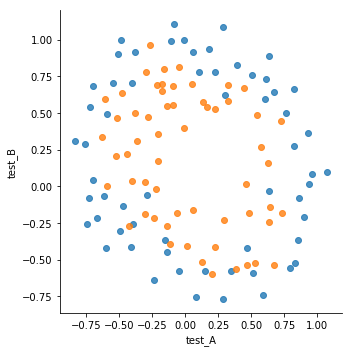

In [4]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="test_A", y="test_B", data=df, fit_reg=False,hue = 'label' ,legend=False)
plt.show()

In [5]:
#Training and labels
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [6]:
X.insert(loc = 0,column = 'bias',value=np.ones(X.shape[0]))

In [7]:
#Adding polynomial features
X['test_A^2'] = X['test_A'] ** 2
X['test_B^2'] = X['test_B'] ** 2
X['testA_testB'] = X['test_A'] * X['test_B']

In [8]:
X.head()

,bias,test_A,test_B,test_A^2,test_B^2,testA_testB
0,1.0,0.051267,0.69956,0.002628,0.489384,0.035864
1,1.0,-0.092742,0.68494,0.008601,0.469143,-0.063523
2,1.0,-0.213710,0.69225,0.045672,0.479210,-0.147941
3,1.0,-0.375000,0.50219,0.140625,0.252195,-0.188321
4,1.0,-0.513250,0.46564,0.263426,0.216821,-0.238990


In [9]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [10]:
w = np.random.normal(0,1,X.shape[1])

In [11]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [12]:
def loss(y,hx):
    return ((-y * np.log(hx)) - (1-y) * np.log(1-hx)).mean()

In [13]:
lemda = 0.01

In [14]:
def newton(w,epochs,lamda):
    weights = []
    errors = []
    w = w.reshape(-1,1)
    for i in range(epochs):
        pred = np.dot(X_train,w)
        print(pred.shape)
        h = sigmoid(pred)
        #h = h.reshape(-1,1)
        a = h*(1-h)*X_train
        error = loss(Y_train.values.reshape(-1,1),h)
        grad = np.dot(X_train.T,h- Y_train.values.reshape(-1,1)) + lamda * w
        hess = a.T @ X_train + lamda
        weights.append(w)
        errors.append(error)
        w = w - np.matmul(np.linalg.pinv(hess),grad);
    return weights,errors

In [15]:
theta,cost = newton(w,15,lemda)

(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)
(82, 1)


Text(0,0.5,'value of cost')

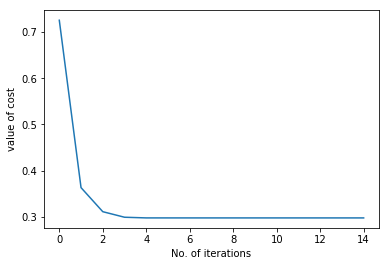

In [16]:
plt.plot(cost)
plt.xlabel("No. of iterations")
plt.ylabel("value of cost")

In [17]:
theta = theta[-1]

In [18]:
theta.reshape(-1,)

array([  4.4776109 ,   4.22540579,   3.59939907, -11.55871254,
        -9.93246543,  -8.21994261])

In [19]:
def pred(data):
    return sigmoid(np.dot(data,theta))

In [20]:
a = pred(X_test)

In [21]:
a = a >= 0.5
a = a.reshape(-1,)
pred = pd.DataFrame(data = {"label":a}).astype(int)

In [22]:
Y_test = Y_test.reset_index(drop=True)

In [23]:
predicted_data = pd.concat([pred,pd.DataFrame({"Actual_label":Y_test})],axis = 1)

In [24]:
predicted_data.head()

,label,Actual_label
0,1,0
1,1,1
2,0,0
3,1,0
4,0,0


In [25]:
accuracy = 1 - np.sum(abs(predicted_data['label'] - predicted_data['Actual_label']))/predicted_data.shape[0]


In [26]:
print("Accuracy of the model with regularization is :",accuracy)

Accuracy of the model with regularization is : 0.75


In [27]:
X = X.values

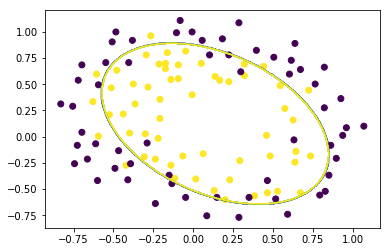

In [28]:
h = .005 # step size in the mesh
x_min, x_max = X[:, 1].min() - .1, X[:, 1].max() + .1
y_min, y_max = X[:, 2].min() - .1, X[:, 2].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

t = np.insert(np.c_[xx.ravel(), yy.ravel()],0,1,axis=1)
T = np.insert(t,3,t[:,1]**2,axis=1)
T = np.insert(T,4,t[:,2]**2,axis=1)
T=np.insert(T,5,t[:,1] * t[:,2],axis = 1)
Z = (T @ theta) > 0
Z = Z.reshape(xx.shape)
plt.scatter(X[:,1], X[:,2],c=Y)
plt.contour(xx, yy, Z)